In [1]:
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import build_montages
from sklearn.model_selection import StratifiedKFold

from data_loader import load_image, create_labels

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
image_dir1 = r"D:\ib811_wrist_vein_database\Ours\s1"
image_dir2 = r"D:\ib811_wrist_vein_database\Ours\s2"

images1 = load_image(image_dir1)
images2 = load_image(image_dir2)

pairs_1, pairs_2, labels = create_labels(images1, images2)
labels = np.array(labels)
 
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


Fold 1/5


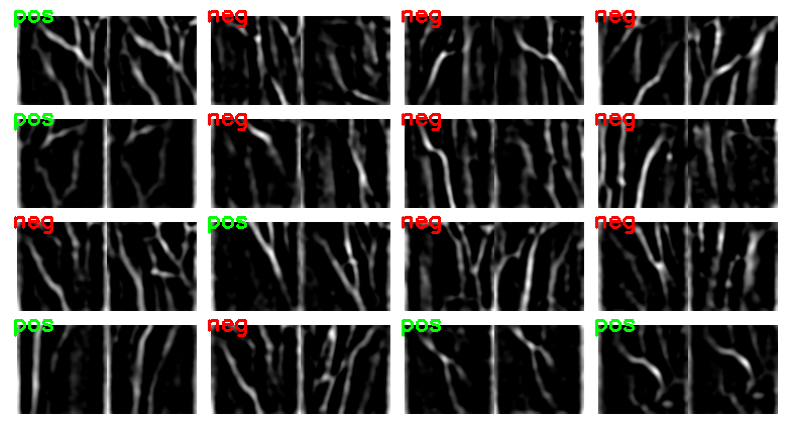

Fold 2/5


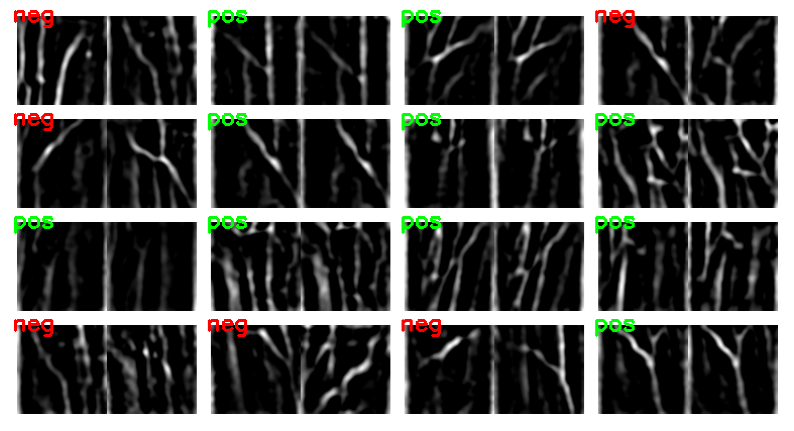

Fold 3/5


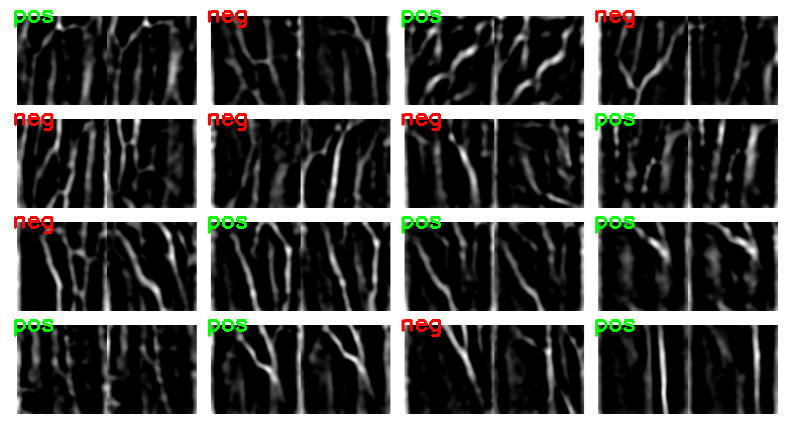

Fold 4/5


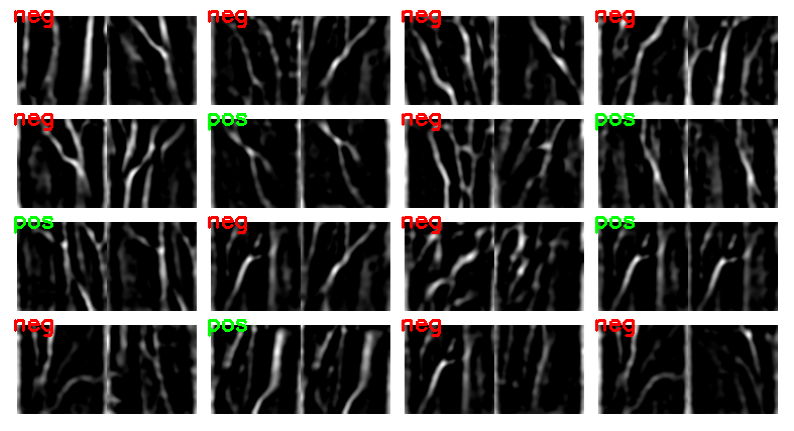

Fold 5/5


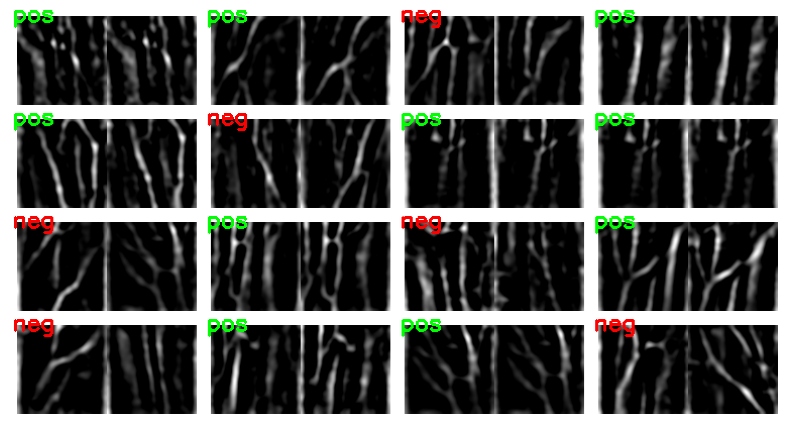

In [4]:
for fold, (train_idx, val_idx) in enumerate(kf.split(pairs_1, labels)):
    print(f"Fold {fold+1}/{n_splits}")

    train_pairs_1 = np.array(pairs_1)[train_idx]
    train_pairs_2 = np.array(pairs_2)[train_idx]
    train_labels  = labels[train_idx]

    # Randomly sample 49 pairs for visualization
    sample_count = min(49, len(train_pairs_1))
    sample_idx_list = random.sample(range(len(train_pairs_1)), sample_count)

    images_for_montage = []
    for i in sample_idx_list:
        imageA = train_pairs_1[i] 
        imageB = train_pairs_2[i]  

        label  = train_labels[i]
        
        border_size = 10

        output = np.full((128 + 2*border_size, 256 + 2*border_size, 3), 255, dtype="uint8")


        imageA_3c = cv2.cvtColor(imageA, cv2.COLOR_GRAY2BGR)
        imageB_3c = cv2.cvtColor(imageB, cv2.COLOR_GRAY2BGR)


        output[border_size:-border_size, border_size:128+border_size, :] = imageA_3c
        output[border_size:-border_size, 128+border_size:-border_size, :] = imageB_3c

        text = "pos" if label == 0 else "neg"
        color = (0,255,0) if label == 0 else (0,0,255)

        vis = cv2.resize(output, (192, 102), interpolation=cv2.INTER_LINEAR)
        cv2.putText(vis, text, (2,12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

        images_for_montage.append(vis)

    montage = build_montages(images_for_montage, (192,102), (4,4))[0]

    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(montage, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()